In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qnmfitsrd as qnmfits
from multiprocessing import Pool
from spatial_reconstruction import *
from qnm_visualisation import qnm_viz
from matplotlib.animation import FuncAnimation

In [2]:

# TO DO: import data properly 
sim = qnmfits.SXS(ID=305, zero_time=(2,2))

/data/rvnd2/python_envs/python-3.11-clone/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


In [3]:
l_max = 6
n_max = 7
t0 = {0:40., 1:18.5, 2:12., 3:8., 4:5.5, 5:3., 6:1.5, 7:0.}[n_max]
qnm_viz = qnm_viz(sim, l_max=l_max)

In [4]:
mapping = [(2,2,0,1)]

QNMs = [(lam,mu,n,p) for lam in np.arange(2, l_max+1)
                        for mu in np.arange(-lam, lam+1)
                           for n in np.arange(0, n_max+1)
                              for p in (-1, +1)]

best_fit_linear = qnmfits.mapping_multimode_ringdown_fit(sim.times, 
                                        sim.h, 
                                        modes=QNMs.copy(),
                                        Mf=sim.Mf,
                                        chif=sim.chif_mag,
                                        t0=t0,
                                        mapping_modes=mapping,
                                        spherical_modes=[(l,m) for l in np.arange(2, l_max+1)
                                                               for m in np.arange(-l,l+1)])

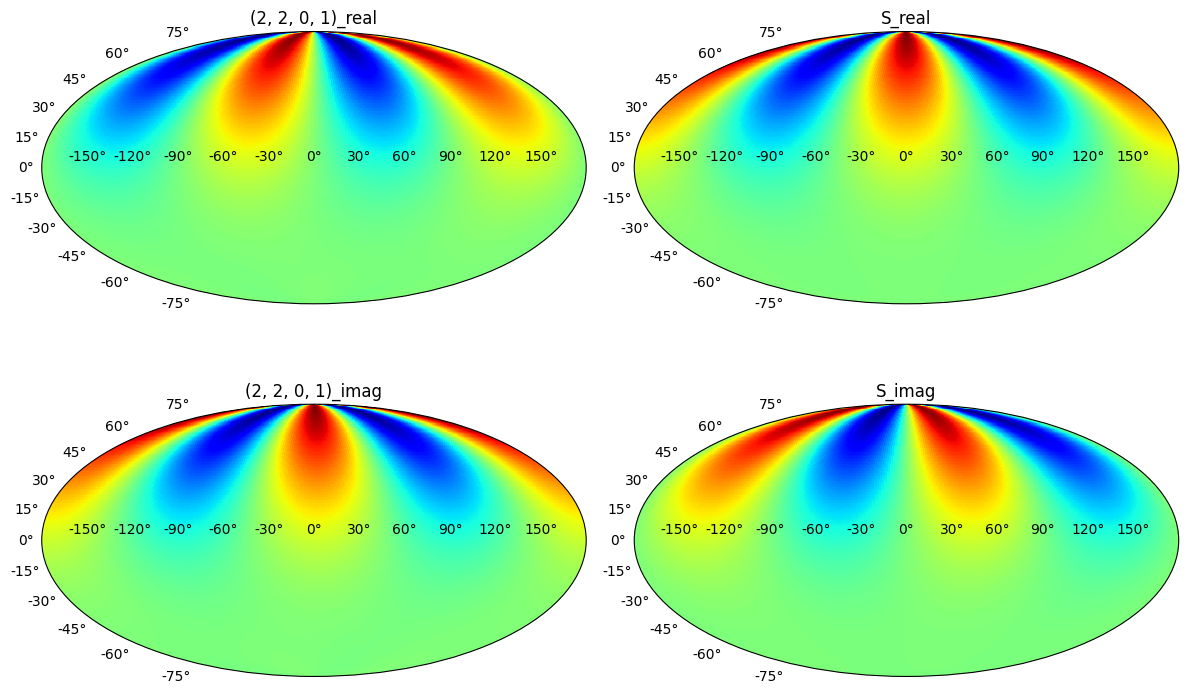

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, 
                        subplot_kw={'projection': 'mollweide'}, 
                        figsize=(12,8))

lon = np.linspace(-np.pi, np.pi, 200)
lat = np.linspace(-np.pi/2, np.pi/2, 200)

map = mapping[0]

Lon, Lat = np.meshgrid(lon, lat)
F = mode_mapping(np.pi/2-Lat, Lon, best_fit_linear, map, l_max)
G = spheroidal(np.pi/2-Lat, Lon, map, l_max, sim.chif_mag)

axs[0,0].title.set_text(str(map)+'_real')
axs[0,0].pcolormesh(Lon, Lat, np.real(F), cmap=plt.cm.jet)

axs[1,0].title.set_text(str(map)+'_imag')
axs[1,0].pcolormesh(Lon, Lat, np.imag(F), cmap=plt.cm.jet)

axs[0,1].title.set_text('S_real')
axs[0,1].pcolormesh(Lon, Lat, np.real(G), cmap=plt.cm.jet)

axs[1,1].title.set_text('S_imag')
axs[1,1].pcolormesh(Lon, Lat, np.imag(G), cmap=plt.cm.jet)

plt.tight_layout()
plt.show()

# Quadratic Test

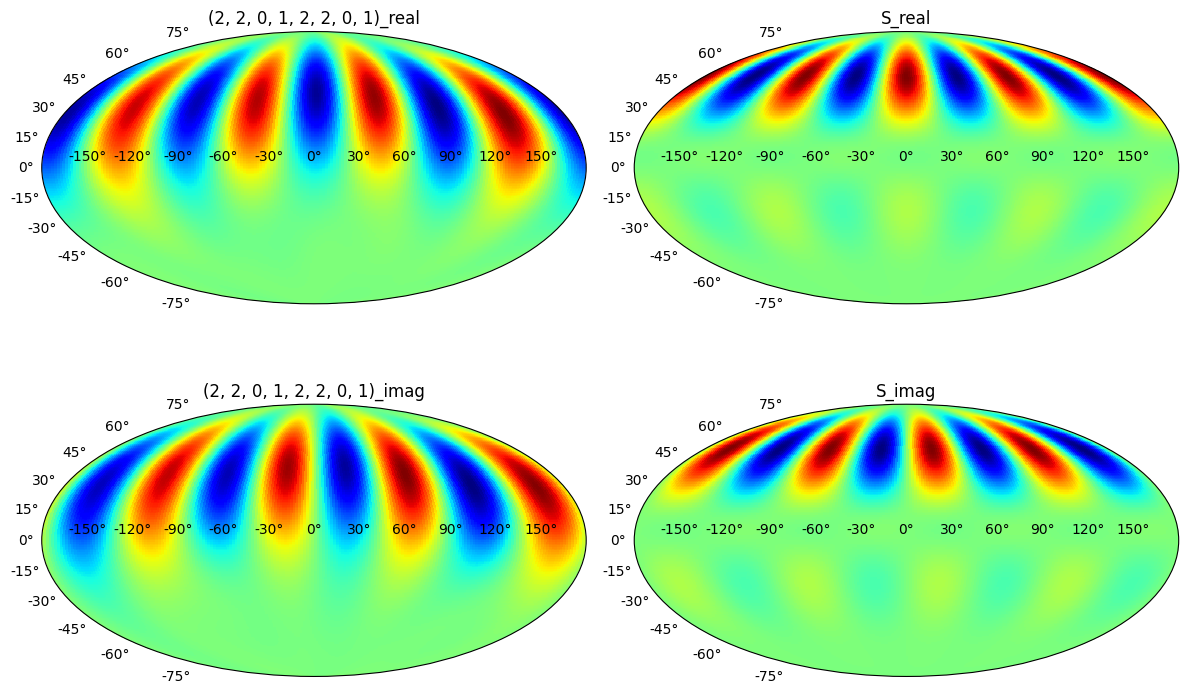

In [6]:
mapping = [(2,2,0,1,2,2,0,1)]

QNMs = [(lam,mu,n,p) for lam in np.arange(2, l_max+1)
                        for mu in np.arange(-lam, lam+1)
                           for n in np.arange(0, n_max+1)
                              for p in (-1, +1)] + mapping 

best_fit_quad = qnmfits.mapping_multimode_ringdown_fit(sim.times, 
                                        sim.h, 
                                        modes=QNMs.copy(),
                                        Mf=sim.Mf,
                                        chif=sim.chif_mag,
                                        t0=t0,
                                        mapping_modes=mapping,
                                        spherical_modes=[(l,m) for l in np.arange(2, l_max+1)
                                                               for m in np.arange(-l,l+1)])

lon = np.linspace(-np.pi, np.pi, 200)
lat = np.linspace(-np.pi/2, np.pi/2, 200)
Lon, Lat = np.meshgrid(lon, lat)

md_mapping = mode_mapping(np.pi/2-Lat, Lon, best_fit_quad, mapping[0], l_max)
expected = spheroidal(np.pi/2-Lat, Lon, mapping[0], l_max, sim.chif_mag)

qnm_viz.plot_mapping_projection(mapping[0], md_mapping, expected)

plt.tight_layout()
plt.show()

#### Spatial reconstruction of multiple modes

In [15]:
mapping = [(3,3,0,1)] 

QNMs = [(lam,mu,n,p) for lam in np.arange(2, l_max+1)
                        for mu in np.arange(-lam, lam+1)
                           for n in np.arange(0, n_max+1)
                              for p in (-1, +1)] 
                                                            
best_fit_multi = qnmfits.mapping_multimode_ringdown_fit(sim.times, 
                                        sim.h, 
                                        modes=QNMs.copy(),
                                        Mf=sim.Mf,
                                        chif=sim.chif_mag,
                                        t0=t0,
                                        mapping_modes=mapping,
                                        spherical_modes=[(l,m) for l in np.arange(2, l_max+1)
                                                               for m in np.arange(-l,l+1)])

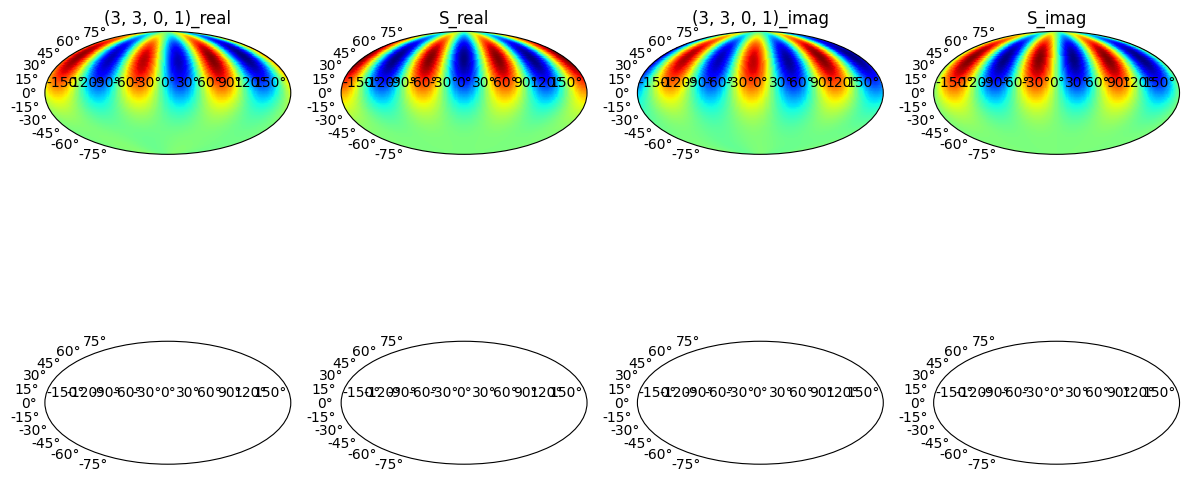

In [17]:

if len(mapping) == 1:
   nrows = 
else:
   nrows = len(mapping)

fig, axs = plt.subplots(nrows=nrows, ncols=4, 
                  subplot_kw={'projection': 'mollweide'}, 
                  figsize=(12,8))

lon = np.linspace(-np.pi, np.pi, 200)
lat = np.linspace(-np.pi/2, np.pi/2, 200)

Lon, Lat = np.meshgrid(lon, lat)

for i, mode in enumerate(mapping):
   F = mode_mapping(np.pi/2-Lat, Lon, best_fit_multi, mode, l_max)
   G = spheroidal(np.pi/2-Lat, Lon, mode, l_max, sim.chif_mag)

   axs[i, 0].title.set_text(str(mode)+'_real')
   axs[i, 0].pcolormesh(Lon, Lat, np.real(F), cmap=plt.cm.jet)

   axs[i, 1].title.set_text('S_real')
   axs[i, 1].pcolormesh(Lon, Lat, np.real(G), cmap=plt.cm.jet)

   axs[i, 2].title.set_text(str(mode)+'_imag')
   axs[i, 2].pcolormesh(Lon, Lat, np.imag(F), cmap=plt.cm.jet)

   axs[i, 3].title.set_text('S_imag')
   axs[i, 3].pcolormesh(Lon, Lat, np.imag(G), cmap=plt.cm.jet)

plt.tight_layout()
plt.show()

In [9]:
l_max = 3
n_max = 3

mapping = [(lam,mu,n,1) for lam in np.arange(2, l_max+1)
                        for mu in np.arange(-lam, lam+1)
                           for n in np.arange(0, n_max+1)] 

QNMs = [(lam,mu,n,1) for lam in np.arange(2, l_max+1)
                        for mu in np.arange(-lam, lam+1)
                           for n in np.arange(0, n_max+1)] 

best_fit_linear = qnmfits.mapping_multimode_ringdown_fit(sim.times, 
                                        sim.h, 
                                        modes=QNMs.copy(),
                                        Mf=sim.Mf,
                                        chif=sim.chif_mag,
                                        t0=t0,
                                        mapping_modes=mapping,
                                        spherical_modes=[(l,m) for l in np.arange(2, l_max+1)
                                                               for m in np.arange(-l,l+1)])

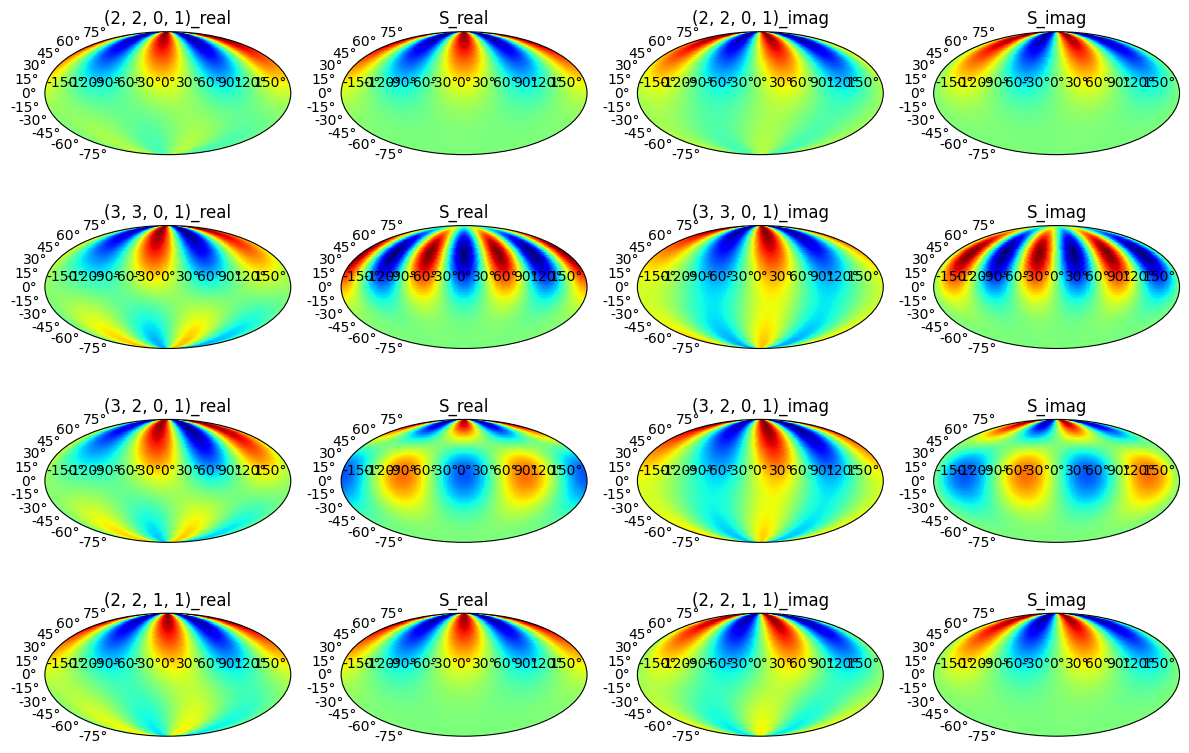

In [10]:
mapping_choice = [(2,2,0,1),(3,3,0,1),(3,2,0,1),(2,2,1,1)]

fig, axs = plt.subplots(nrows=(len(mapping_choice)), ncols=4, 
                  subplot_kw={'projection': 'mollweide'}, 
                  figsize=(12,8))

lon = np.linspace(-np.pi, np.pi, 200)
lat = np.linspace(-np.pi/2, np.pi/2, 200)

Lon, Lat = np.meshgrid(lon, lat)

for i, mode in enumerate(mapping_choice):
   F = mode_mapping(np.pi/2-Lat, Lon, best_fit_linear, mode, l_max)
   G = spheroidal(np.pi/2-Lat, Lon, mode, l_max, sim.chif_mag)

   axs[i, 0].title.set_text(str(mode)+'_real')
   axs[i, 0].pcolormesh(Lon, Lat, np.real(F), cmap=plt.cm.jet)

   axs[i, 1].title.set_text('S_real')
   axs[i, 1].pcolormesh(Lon, Lat, np.real(G), cmap=plt.cm.jet)

   axs[i, 2].title.set_text(str(mode)+'_imag')
   axs[i, 2].pcolormesh(Lon, Lat, np.imag(F), cmap=plt.cm.jet)

   axs[i, 3].title.set_text('S_imag')
   axs[i, 3].pcolormesh(Lon, Lat, np.imag(G), cmap=plt.cm.jet)

plt.tight_layout()
plt.show()